# Model experiments

In [218]:
from keras.preprocessing import image
import numpy as np
import os
from os import listdir
from os.path import isfile, join
from skimage.io import imread
from skimage.transform import resize

# load images
path = '../data/128x128'
classes = next(os.walk(path))[1]
images = []
labels = []
for label, class_name in enumerate(classes):
    files = next(os.walk(join(path, class_name)))[2]
    for file in files:
        filename = join(path, class_name, file)
        try:
            img = image.load_img(filename)
            img_arr = image.img_to_array(img)
        except:
            pass

        if not img_arr.shape == (IMG_SIZE, IMG_SIZE, 3):
            print("Unexpected shape")
            continue

        images.append(img_arr)
        labels.append(label)    

print("Loaded %d images" % len(images))

Loaded 1671 images


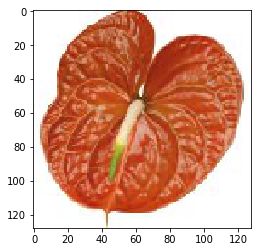

In [219]:
# show a single image
import matplotlib.pyplot as plt
import PIL

img_data = np.uint8(images[7])
plt.imshow(img_data)

In [221]:
import random
#from keras.applications.vgg16 import preprocess_input
#from keras.applications.resnet50 import preprocess_input
from keras.applications.mobilenet import preprocess_input

# shuffle all samples
samples = list(zip(images,labels))
#random.shuffle(samples)
x,y = zip(*samples)

# make numpy arrays
x = np.array(x)
y = np.array(y)

# one hot encoding of labels
y = keras.utils.to_categorical(y)

# perform preprocessing for vgg16
x = preprocess_input(x)

# check shapes
print(x.shape, y.shape)

# split test / train set
split = 100
train_size = 400
test_x = x[:split]
test_y = y[:split]
train_x = x[split:split + train_size]
train_y = y[split:split + train_size]

(1671, 128, 128, 3) (1671, 3)


In [224]:
import keras
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import SGD

#base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape = (IMG_SIZE, IMG_SIZE, 3))
#base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, 3))
base_model = keras.applications.mobilenet.MobileNet(weights='imagenet', include_top=False, input_shape = (IMG_SIZE, IMG_SIZE, 3))

base_model.trainable = False

model = keras.models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.summary()


sgd = SGD(lr=0.0005)
     
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(x = train_x, y = train_y, batch_size = 1, validation_split = 0.5, epochs = 10, verbose=1)

model.evaluate(test_x, test_y)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_16  (None, 1024)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 256)               262400    
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 3)                 771       
Total params: 3,492,035
Trainable params: 263,171
Non-trainable params: 3,228,864
_________________________________________________________________
Train on 200 samples, validate on 200 samples
Epoch 1/10
200/200 [==============================] - 24s 118ms/step - loss: 0.0

[0.00791412909515202, 1.0]